In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
import pandas_profiling
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [47]:
automobile =pd.read_csv("https://raw.githubusercontent.com/shaik4182/Data-Sets-For-Machine-Learnig-and-Data-Science/master/DataSets/Automobile%20price%20data%20_Raw_.csv")

In [48]:
automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [49]:
automobile.shape

(205, 26)

In [50]:
automobile.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [51]:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [52]:
auto=automobile.replace('?',np.nan)

In [53]:
auto.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [54]:
df_temp = automobile[automobile["normalized-losses"]!='?']
normalised_mean = df_temp['normalized-losses'].astype(int).mean()
automobile['normalized-losses'] =automobile['normalized-losses'].replace('?',normalised_mean).astype(int)

df_temp = automobile[automobile['price']!='?']
normalised_mean = df_temp['price'].astype(int).mean()
automobile['price'] = automobile['price'].replace('?',normalised_mean).astype(int)

df_temp = automobile[automobile['horsepower']!='?']
normalised_mean = df_temp['horsepower'].astype(int).mean()
automobile['horsepower'] = automobile['horsepower'].replace('?',normalised_mean).astype(int)

df_temp = automobile[automobile['peak-rpm']!='?']
normalised_mean = df_temp['peak-rpm'].astype(int).mean()
automobile['peak-rpm'] = automobile['peak-rpm'].replace('?',normalised_mean).astype(int)

df_temp = automobile[automobile['bore']!='?']
normalised_mean = df_temp['bore'].astype(float).mean()
automobile['bore'] = automobile['bore'].replace('?',normalised_mean).astype(float)

df_temp = automobile[automobile['stroke']!='?']
normalised_mean = df_temp['stroke'].astype(float).mean()
automobile['stroke'] = automobile['stroke'].replace('?',normalised_mean).astype(float)


automobile['num-of-doors'] = automobile['num-of-doors'].replace('?','four')
automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [55]:
automobile.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

#### Summary statistics of variable

In [56]:
automobile.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.253659,5125.365854,25.219512,30.751220,13207.126829
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519219,476.979095,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### Exploratory data analysis

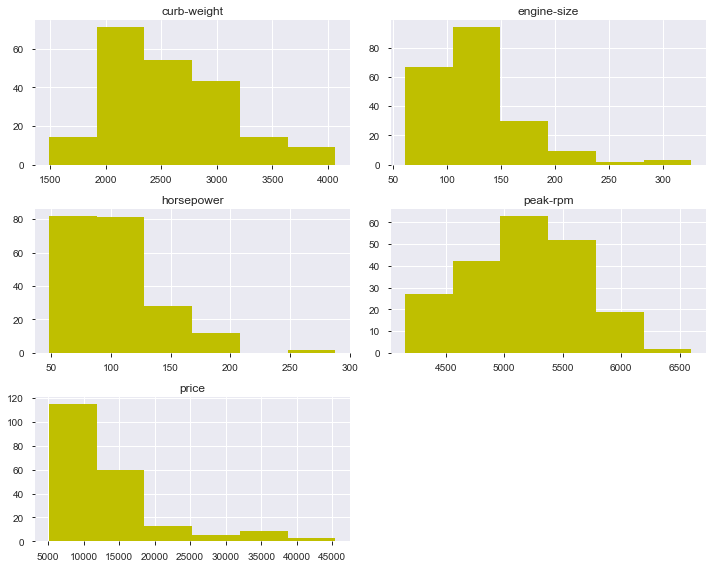

In [57]:
automobile[['engine-size','peak-rpm','curb-weight','horsepower','price']].hist(figsize=(10,8),bins=6,color='y')
plt.tight_layout()
plt.show()

### Findings:
##### Most of the car has a Curb Weight is in range 1900 to 3100
##### The Engine Size is inrange 60 to 190
##### Most vehicle has horsepower 50 to 125
##### Most Vehicle are in price range 5000 to 18000
##### peak rpm is mostly distributed between 4600 to 5700

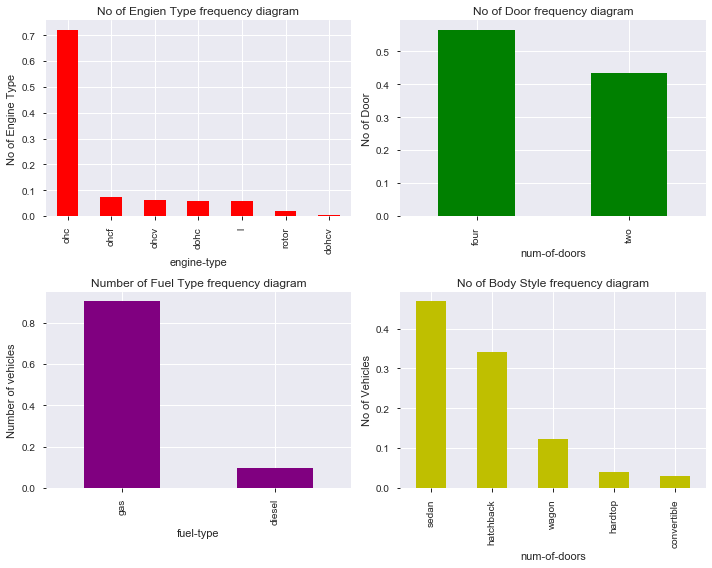

In [58]:
plt.figure(1)
plt.subplot(221)
automobile['engine-type'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='red')
plt.title("No of Engien Type frequency diagram")
plt.ylabel("No of Engine Type")
plt.xlabel("engine-type")

plt.subplot(222)
automobile['num-of-doors'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='green')
plt.title("No of Door frequency diagram")
plt.ylabel("No of Door")
plt.xlabel("num-of-doors")

plt.subplot(223)
automobile['fuel-type'].value_counts(normalize= True).plot(figsize=(10,8),kind='bar',color='purple')
plt.title("Number of Fuel Type frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('fuel-type')

plt.subplot(224)
automobile['body-style'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='y')
plt.title("No of Body Style frequency diagram")
plt.ylabel("No of Vehicles")
plt.xlabel("num-of-doors")
plt.tight_layout()
plt.show()

### Findings

##### More than 70 % of the vehicle has Ohc type of Engine
##### 57% of the cars has 4 doors
##### Gas is preferred by 85 % of the vehicles
##### Most produced vehicle are of body style sedan around 48% followed by hatchback 32%

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.465190,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130083,-0.008689,-0.178515,0.071380,0.273678,-0.035823,0.034606,-0.082201
normalized-losses,0.465190,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.029266,0.054929,-0.114525,0.203434,0.237748,-0.218749,-0.178221,0.133999
wheel-base,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,0.249786,0.351985,-0.360700,-0.470414,-0.544082,0.583168
length,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,0.158414,0.554408,-0.287034,-0.670909,-0.704662,0.682986
width,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,0.181129,0.642176,-0.219861,-0.642704,-0.677218,0.728699
height,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,0.261214,-0.110114,-0.320599,-0.048640,-0.107358,0.134388
curb-weight,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,0.151362,0.750973,-0.266282,-0.757414,-0.797465,0.820825
engine-size,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,0.028971,0.810705,-0.244600,-0.653658,-0.677470,0.861752
bore,-0.130083,-0.029266,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,0.005201,0.575707,-0.254765,-0.584508,-0.586992,0.532300
stroke,-0.008689,0.054929,0.160944,0.129522,0.182939,-0.055351,0.168783,0.203094,-0.055909,1.000000,0.186105,0.088133,-0.066860,-0.042179,-0.043961,0.082095


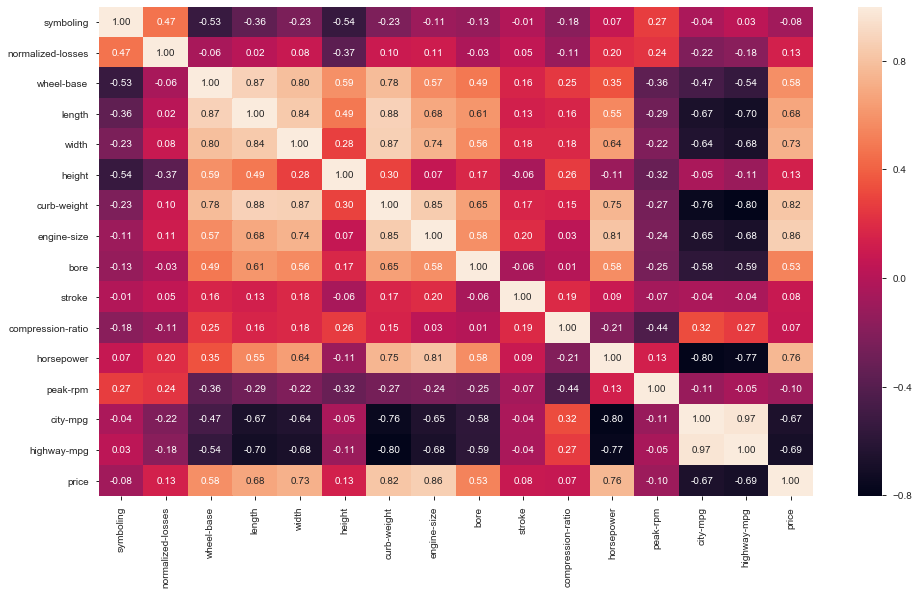

In [59]:
plt.figure(figsize=(16,9))
corr = automobile.corr()
sns.heatmap(corr,annot=True,fmt='.2f')
corr

### Findings

##### curb-weight, engine-size, horsepower are positively corelated
##### city-mpg,highway-mpg are negatively corelated

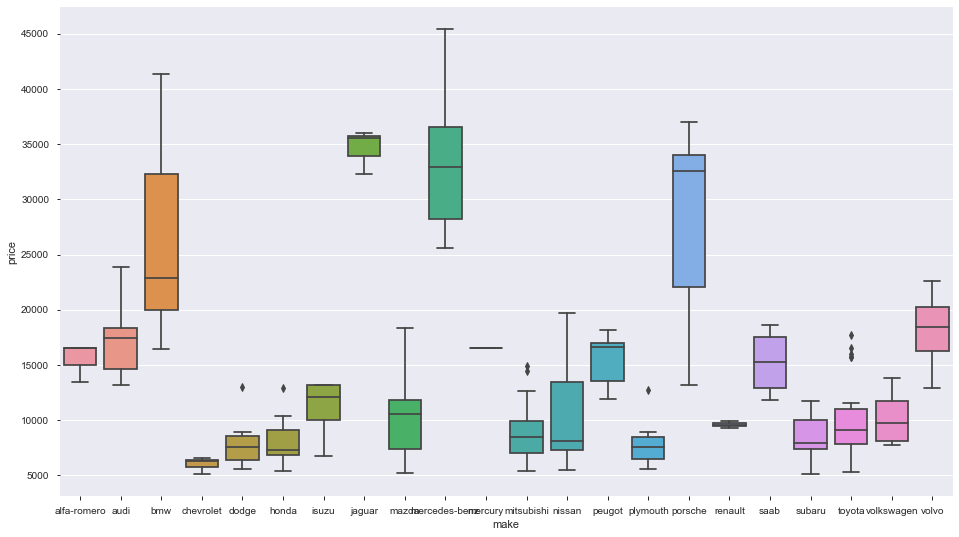

In [60]:
plt.figure(figsize=(16,9))
ax = sns.boxplot(x="make", y ="price",data=automobile)

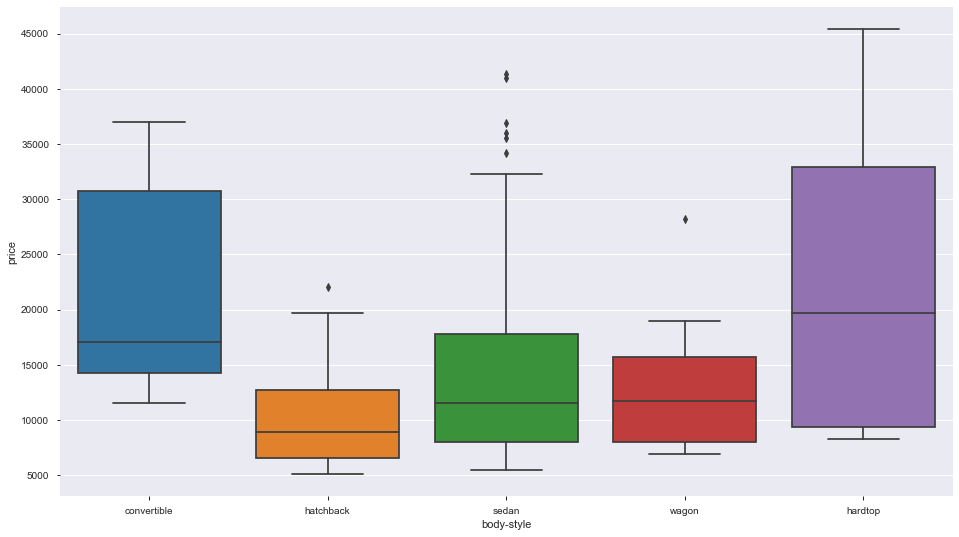

In [61]:
plt.figure(figsize=(16,9))
ax = sns.boxplot(x = "body-style", y="price", data=automobile)

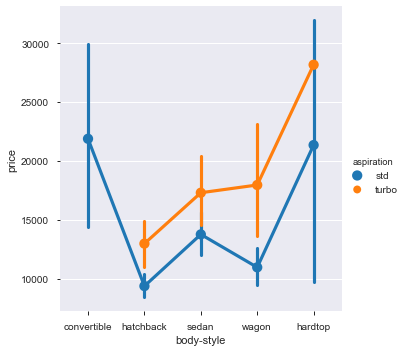

In [62]:
sns.catplot(data=automobile , x="body-style", y= 'price',hue="aspiration",kind="point")

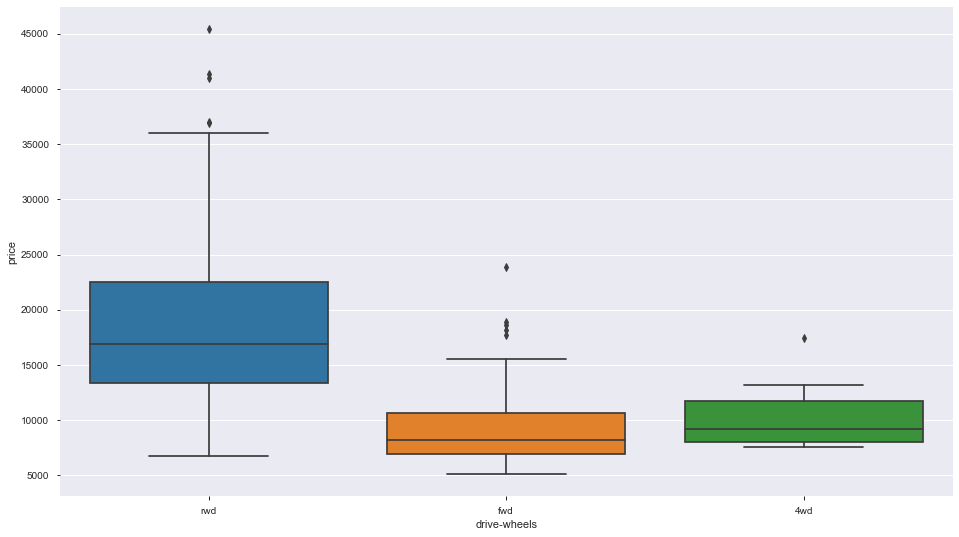

In [63]:
plt.figure(figsize=(16,9))
ax = sns.boxplot(x="drive-wheels", y="price", data=automobile)

#### Findings

##### Mercedez-Benz ,BMW, Jaguar, Porshe produces expensive cars more than 25000
##### cheverolet,dodge, honda,mitbushi, nissan,plymouth subaru,toyata ##### produces budget models with lower prices
##### most of the cars comapany produces car in range below 25000
##### Hardtop model are expensive in prices followed by convertible and sedan body style
#### Turbo models have higher prices than for the standard model
#### Convertible has only standard edition with expensive cars
#### hatchback and sedan turbo models are available below 20000
#### rwd wheel drive vehicle have expensive prices

c:\users\shaik shameer\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


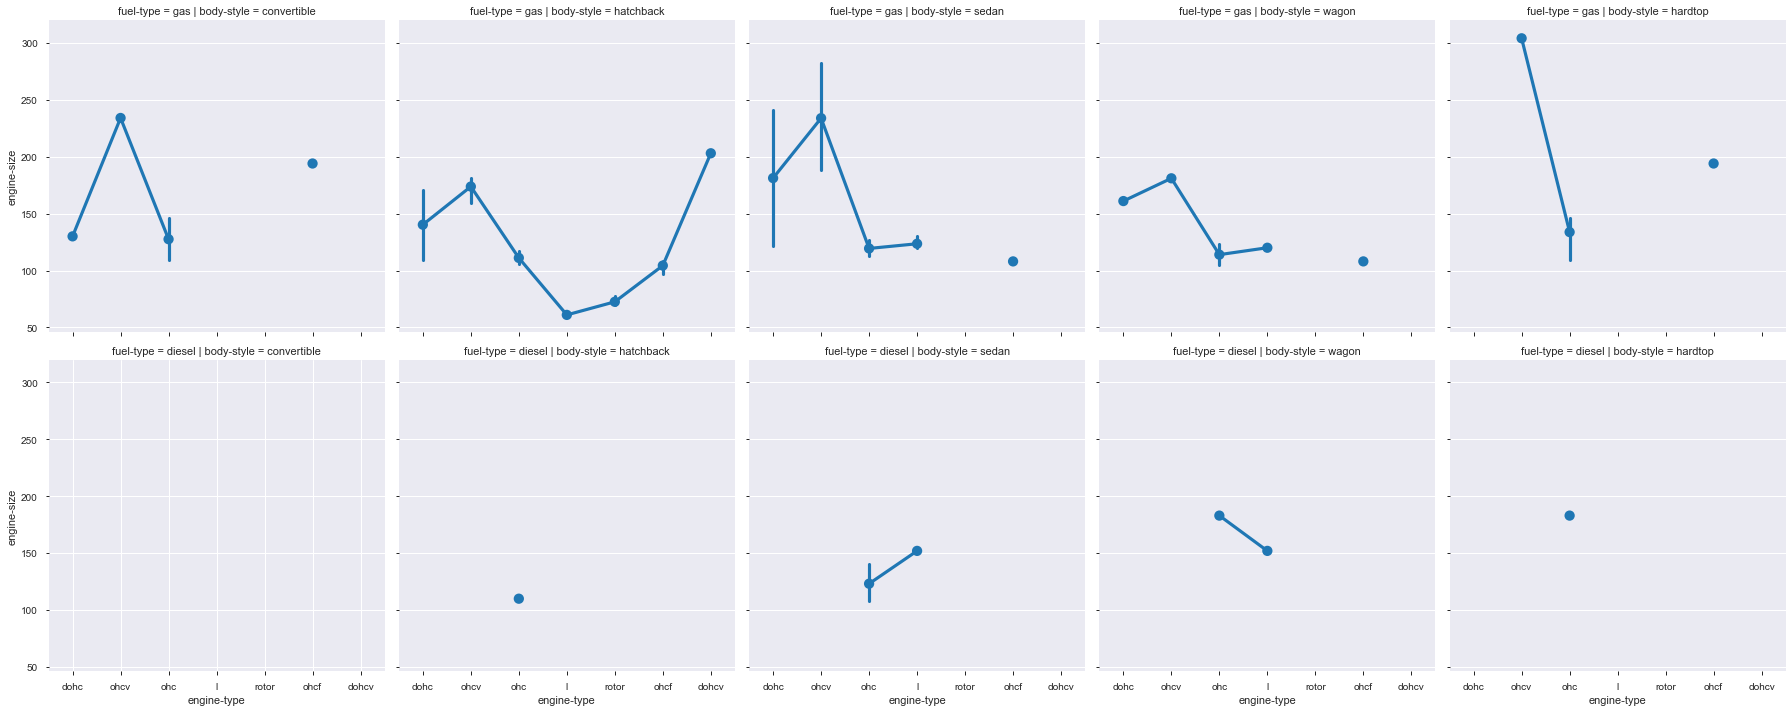

In [64]:
sns.factorplot(data= automobile, x="engine-type", y="engine-size", col="body-style",row="fuel-type")

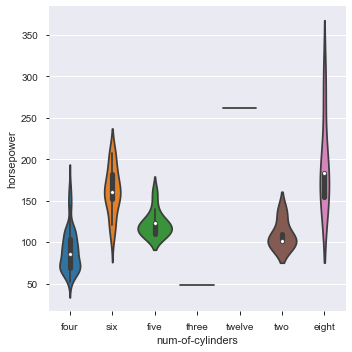

In [65]:
sns.catplot(data=automobile, x="num-of-cylinders",y="horsepower",kind="violin")

#### Findings

##### ohc is the most used Engine Type both for diesel and gas
##### Diesel vehicle have Engine type "ohc" and "I" and engine size ranges between 100 to 190
##### Engine type ohcv has the bigger Engine size ranging from 155 to 300
##### Body-style Hatchback uses max variety of Engine Type followed by sedan
##### Body-style Convertible is not available with Diesel Engine type
##### Vehicle with above 200 horsepower has Eight Twelve Six cyclinders

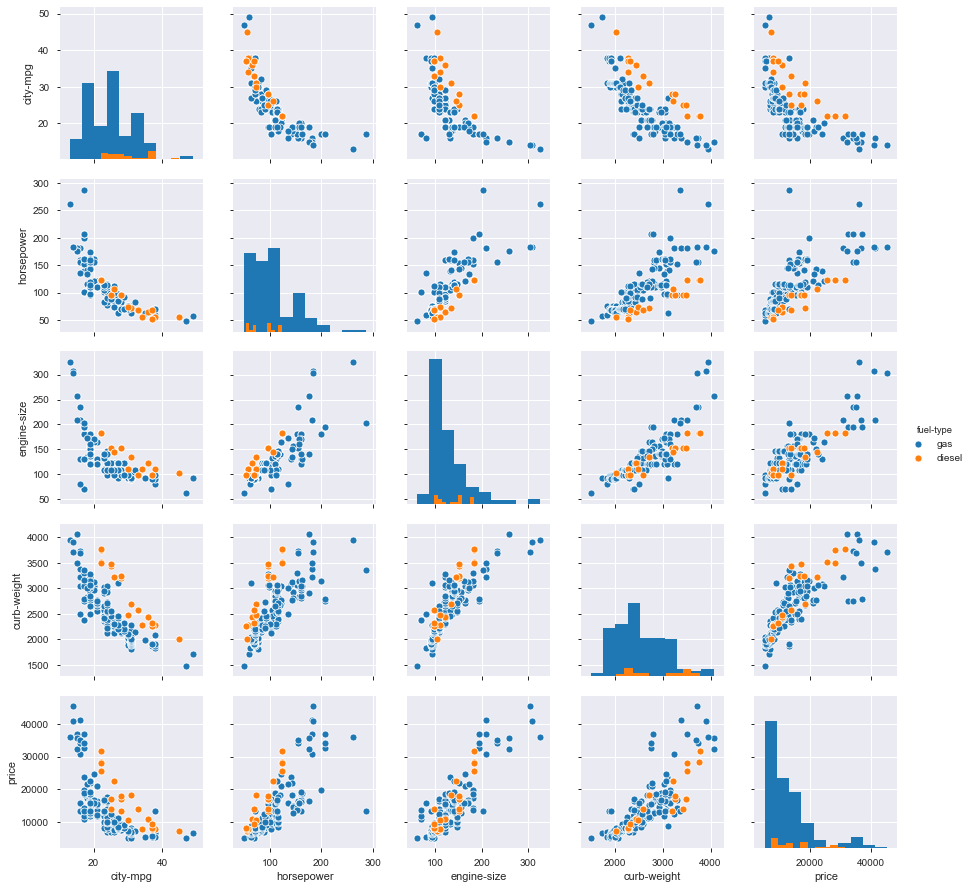

In [66]:
sns.pairplot(automobile[["city-mpg", "horsepower", "engine-size", "curb-weight","price", "fuel-type"]], hue="fuel-type", diag_kind="hist")

Findings:

Vehicle Mileage decrease as increase in Horsepower , engine-size, Curb Weight

As horsepower increase the engine size increases

Curbweight increases with the increase in Engine Size

Price Analysis:

engine size and curb-weight is positively co realted with price

city-mpg is negatively corelated with price as increase horsepower reduces the mileage

In [127]:
x = automobile[["horsepower"]]

In [128]:
x

,horsepower
0,111
1,111
2,154
3,102
4,115
...,...
200,114
201,160
202,134
203,106


In [129]:
y = automobile["price"]

In [130]:
y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: int32

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [134]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((164, 1), (164,), (41, 1), (41,))

In [137]:
Train_data=pd.DataFrame(x_train)
Train_data.head(3)

,horsepower
96,69
95,69
59,84


In [142]:
Train_data["price"]=y_train
Train_data.head(3)

,horsepower,price
96,69,7499
95,69,7799
59,84,8845


In [145]:
y_test.shape

(41,)

In [149]:
Test_Data = pd.DataFrame(x_test)
Test_Data.head(3)

,horsepower
3,102
134,110
44,70


In [151]:
Test_Data["price"]=y_test
Test_Data.head()

,horsepower,price
3,102,13950
134,110,15040
44,70,13207
97,69,7999
55,101,10945


In [152]:
model = LinearRegression()

In [153]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [154]:
model.coef_

array([-6.49722641e-14,  1.00000000e+00])

In [155]:
model.intercept_

3.637978807091713e-12

In [156]:
model.score(x_train,y_train)

1.0

In [157]:
model.score(x_test,y_test)

1.0

In [158]:
y_pred = model.predict(x_test)

In [159]:
y_pred

array([13950., 15040., 13207.,  7999., 10945.,  5499., 12764., 15750.,
       15250., 11549., 18344., 28176., 12170.,  9639., 16500., 18920.,
       18150., 32250.,  5389.,  8948.,  7738.,  5399., 11595.,  9298.,
       45400.,  9279., 15690., 14869.,  7995., 30760.,  7775.,  7609.,
       22625.,  7898.,  6095., 11900.,  6855., 34028.,  7198., 16503.,
        9995.])

In [160]:
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

In [161]:
df

,Actual,Predicted
3,13950,13950.0
134,15040,15040.0
44,13207,13207.0
97,7999,7999.0
55,10945,10945.0
89,5499,5499.0
124,12764,12764.0
181,15750,15750.0
5,15250,15250.0
171,11549,11549.0


In [165]:
print("Mean Absolute Value:", metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Value: 1.1978710706277592e-12


In [166]:
print("Mean Squared Value:", metrics.mean_squared_error(y_test,y_pred))

Mean Squared Value: 3.026270533730589e-24


In [167]:
print("Root Mean Squared Value:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root Mean Squared Value: 1.7396179275147141e-12
